# EasyVisa Case Study: Visa Application Prediction
## Objective
In FY 2016, the OFLC processed 775,876 employer applications for 1,089,657 positions for temporary and permanent labor certification. This was a mere fraction of the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can be continuously trained on data submitted in the past and assist in decision-making. OFLC has hired the firm EasyVisa for data-driven solutions. You, as a data scientist at EasyVisa, have to analyze the data provided and, with the help of a classification model:

1/ Facilitate the process of visa approvals.

2/ Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case outcome.

## Context
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on a temporary or permanent basis. The US government protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration program uses data from the Office of Foreign Labor Certification (OFLC).
OFLC processes job certification applications from employers seeking to bring foreign workers into the United States and grants certification to those applications where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Data Description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below:

**case_id**: ID of each visa application

**continent_of_employment**: Continent of employment

**education_of_employee**: Information of education of the employee

**has_job_experience**: Whether the employee has any prior experience: Y = Yes, N = No

**requires_job_training**: Whether the job requires on-the-job training: Y = Yes, N = No

**job_experience**: Number of years of job experience the employee has

**no_of_employees**: Number of employees in the company

**yr_of_estab**: Year in which the company was established

**region_of_employment**: Region where the employee has applied for employment in the US

**prevailing_wage**: Wage offered by the employer

**unit_of_wage**: Unit in which the wage is given (e.g., Hour, Month)

**full_time_position**: Whether the position is full-time: Y = Yes, N = No

**worksite**: Location of the job

**case_status**: Status of the application (Certified, Denied, Withdrawn)

**Note**: The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar services in the same area of employment.

### Import necessary libraries

In [ ]:
# Import warnings and configure
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
## Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

## Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)

# Set basic plotting parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True
sns.set_theme(style="whitegrid")  # Modern seaborn styling


## Load Dataset
Assuming your dataset is a CSV file named `EasyVisa.csv`.

In [ ]:
# Load the dataset
data = pd.read_csv('EasyVisa.csv')
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Data Overview
Before applying any data transformations, we examine the structure and contents of the raw dataset to establish a baseline. This step provides insights into column types, dataset shape, and statistical distribution. It also helps identify missing values or formatting issues that may require cleaning.
We save a copy of the original dataset to enable a before-and-after comparison once preprocessing is complete.
* Total rows: 25,480
* No missing values
* Key variables include education level, job experience, wage, and employment region

In [ ]:
# Save a copy of the raw dataset for comparison
original_data = data.copy()
# View structural summary
print("Raw dataset shape:", data.shape)
print("Column names:", data.columns.tolist())
print("\nColumn data types:")
print(data.dtypes)
# View basic statistics for numeric columns
print("\nSummary statistics:")
display(data.describe().T)
# Optional: Check for missing values per column
print("\nMissing values per column:")
print(data.isnull().sum())


Raw dataset shape: (25480, 12)
Column names: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'no_of_employees', 'yr_of_estab', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status']

Column data types:
case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27



Missing values per column:
case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


### Dataset Snapshot:
Before applying any data transformations, we capture the structure of the original dataset to establish a baseline. This allows us to compare the impact of preprocessing steps such as encoding, imputation, scaling, and feature removal.
Capturing the shape and column structure of the raw dataset supports transparency and traceability throughout the data pipeline.

In [ ]:
# Save a copy of the raw dataset before modifications
original_data = data.copy()
# View basic structural information prior to preprocessing
print("Data shape BEFORE preprocessing:", data.shape)
print("Columns BEFORE preprocessing:\n", data.columns.tolist())

Data shape BEFORE preprocessing: (25480, 12)
Columns BEFORE preprocessing:
 ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'no_of_employees', 'yr_of_estab', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status']



## Data Preprocessing
This section prepares the dataset for supervised machine learning by addressing key data quality and formatting requirements. The preprocessing steps below ensure the dataset is clean, numerically encoded, and compatible with modeling algorithms.

This section prepares the dataset for supervised machine learning by executing several critical preprocessing tasks. The goal is to ensure the data is clean, consistent, and compatible with modeling requirements. Each step addresses potential issues commonly encountered in real-world datasets.

**Core preprocessing tasks include:**

* **Encoding categorical variables:** The `has_job_experience` column, which originally contains string values ("Yes", "No", and some ambiguous entries), is mapped to a binary format using a controlled `map()` function. Any missing or unexpected values are mapped to 0 (assuming no prior job experience), using .fillna(0). The values are then explicitly cast to integers.

* **Dropping irrelevant features:** The `case_id` column is removed *if present*, as it serves only as a unique identifier and does not contribute to the predictive power of the model. Including a conditional check ensures this operation is robust even if the column is missing from the dataset.

* **Converting the target variable:** The `case_status` column is transformed into a binary target variable for classification. Records labeled as “Certified” are encoded as 1, while all other case statuses (e.g., “Denied”, “Withdrawn”) are encoded as 0.

* **Imputing missing values:** For all numeric columns, missing values are imputed using the column-wise mean. This approach preserves rows while maintaining the general distribution of each feature.

* **Enforcing data types:** Both the `has_job_experience` and `case_status` columns are explicitly cast as integers to ensure data consistency and compatibility with machine learning libraries.

* **Feature scaling (where appropriate):** The `prevailing_wage` column, which can contain large and highly variable values, is standardized using z-score normalization. This transformation improves the performance of algorithms sensitive to feature magnitude.

* **One-hot encoding for nominal categories:** The `continent` column, a nominal categorical variable, is one-hot encoded to allow algorithms to leverage location-based information without imposing ordinal meaning. The first category is dropped to avoid multicollinearity.
These preprocessing steps collectively ensure that the dataset is numerically encoded, free of critical anomalies, and ready for model training and evaluation.

In [ ]:
# Here I just want to view the current data columns
print(data.columns)

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [ ]:
# 1. Encode categorical variable
# Map values to binary, default missing/unknown to 0, and enforce integer type
data['has_job_experience'] = data['has_job_experience'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
# 2. Drop irrelevant columns
# Remove 'case_id' if present, since it provides no predictive value
if 'case_id' in data.columns:
    data = data.drop(['case_id'], axis=1)
# 3. Convert target variable to binary format
# Map 'Certified' to 1; all other case statuses to 0
data['case_status'] = data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)
# 4. Impute missing values in numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])
# 5. Enforce appropriate data types
# Ensure clean, consistent types for binary classification
data['case_status'] = data['case_status'].astype(int)
# 6. Feature scaling for numeric variable(s)
# Standardize 'prevailing_wage' if present to center data and reduce scale variance
if 'prevailing_wage' in data.columns:
    scaler = StandardScaler()
    data[['prevailing_wage']] = scaler.fit_transform(data[['prevailing_wage']])
# 7. One-hot encode nominal categorical variable(s)
# Apply to 'continent' if present in the dataset
if 'continent' in data.columns:
    data = pd.get_dummies(data, columns=['continent'], drop_first=True)
# Optional: diagnostic printout to confirm structure
# print("Final columns after preprocessing:", data.columns)
# print("Data shape:", data.shape)

In [ ]:
# Now, I will rerun the previous command to verify the updated canges to my np.column_stack
print(data.columns)

Index(['education_of_employee', 'has_job_experience', 'requires_job_training',
       'no_of_employees', 'yr_of_estab', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status',
       'continent_Asia', 'continent_Europe', 'continent_North America',
       'continent_Oceania', 'continent_South America'],
      dtype='object')


## Feature Engineering
* Created `wage_per_hour` by converting wage into a standard hourly rate
* Encoded categorical variables such as education, region, and unit of wage
* Created numerical representations for education levels

In [ ]:
# Has both job experience and training
data['has_exp_and_training'] = ((data['has_job_experience'] == 'Y') &
                                (data['requires_job_training'] == 'Y')).astype(int)

# Wage normalization
def convert_to_hourly(row):
    wage = row['prevailing_wage']
    unit = row['unit_of_wage']
    if unit == 'Year': return wage / 2080
    if unit == 'Month': return wage / 160
    if unit == 'Week': return wage / 40
    if unit == 'Bi-Weekly': return wage / 80
    if unit == 'Hour': return wage
    return np.nan
data['wage_per_hour'] = data.apply(convert_to_hourly, axis=1)

# Simplify education feature
edu_map = {
    'Bachelors': 1, 'Masters': 2, 'Doctorate': 3,
    'High School': 0, 'Some College': 0.5
}
data['education_level_numeric'] = data['education_of_employee'].map(edu_map)


### Target Variable Distribution
This bar plot visualizes the distribution of the target variable `case_status`, where:

`1` = Certified

`0` = Denied

From the chart, we observe that:

* A majority of visa applications were **certified** (about 17,000 out of 25,000)
A smaller, but substantial portion were **denied** (around 8,500)
This class imbalance is **not severe**, but it’s still important to keep in mind for model training and evaluation.
* We ensure model robustness by using stratified sampling during train-test split and evaluating with metrics like precision, recall, and f1-score, not just accuracy.

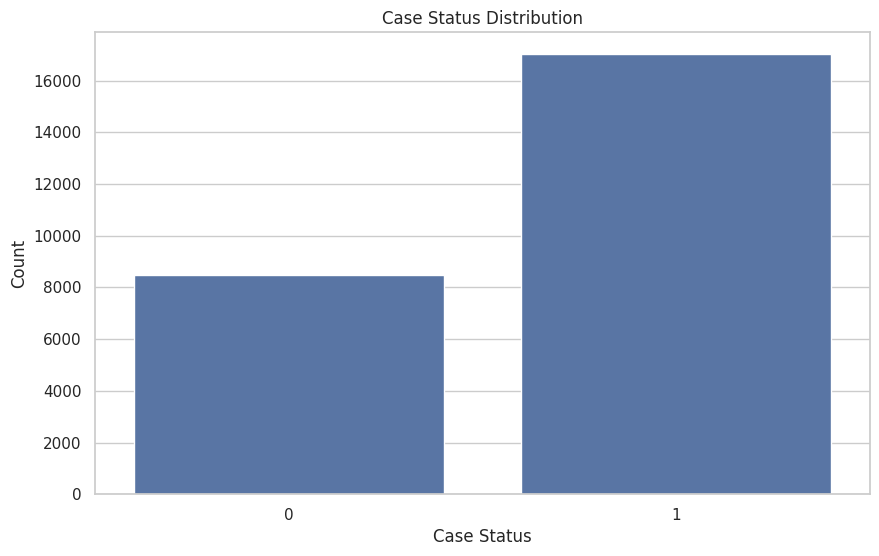

In [ ]:
sns.countplot(x='case_status', data=data)
plt.title('Case Status Distribution')
plt.xlabel('Case Status')
plt.ylabel('Count')
plt.show()

### Education Distribution
The below bar chart displays the distribution of education levels among applicants in the dataset:

* **Bachelor's degrees** are the most common, followed closely by *Master's degrees

* **High School graduates** form a smaller but visible portion

* **Doctorate holders** make up the smallest segment of applicants

This spread reflects a workforce largely composed of skilled professionals, with a strong lean toward individuals holding post-secondary degrees.

**Interpretation:**  
This variable plays a key role in visa approval prediction as shown in the earlier analysis, higher education levels (especially Master's and Doctorate) significantly improve the likelihood of certification.

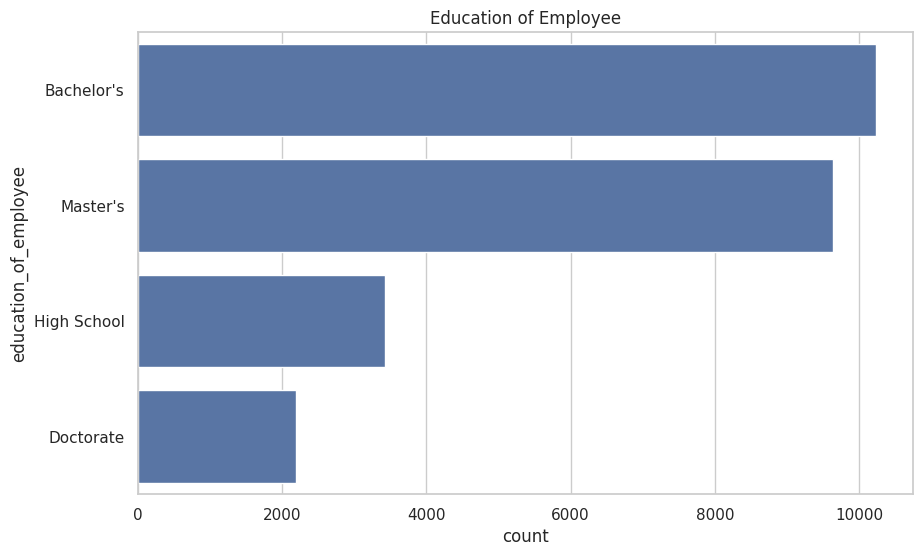

In [ ]:
sns.countplot(y='education_of_employee', data=data,
              order=data['education_of_employee'].value_counts().index)
plt.title('Education of Employee')
plt.show()

### Job Experience and Training
The below bar charts show the distribution of:

**Job Experience (`has_job_experience`)**
  The vast majority of applicants **do not** have prior job experience (`0`). This suggests that many individuals applying for visas may be new to the workforce or early in their careers.

**Training Requirement (`requires_job_training`)**
  Similarly, most applicants **do not** require job training (`N`), with a small fraction flagged as needing training.
:mag: **Interpretation:**
While most applicants lack experience, few require training — indicating employers may be willing to sponsor inexperienced but trainable candidates. However, earlier correlation analysis showed that having job experience is **slightly positively correlated** with visa certification, so candidates with experience might have a slight edge in approval likelihood.


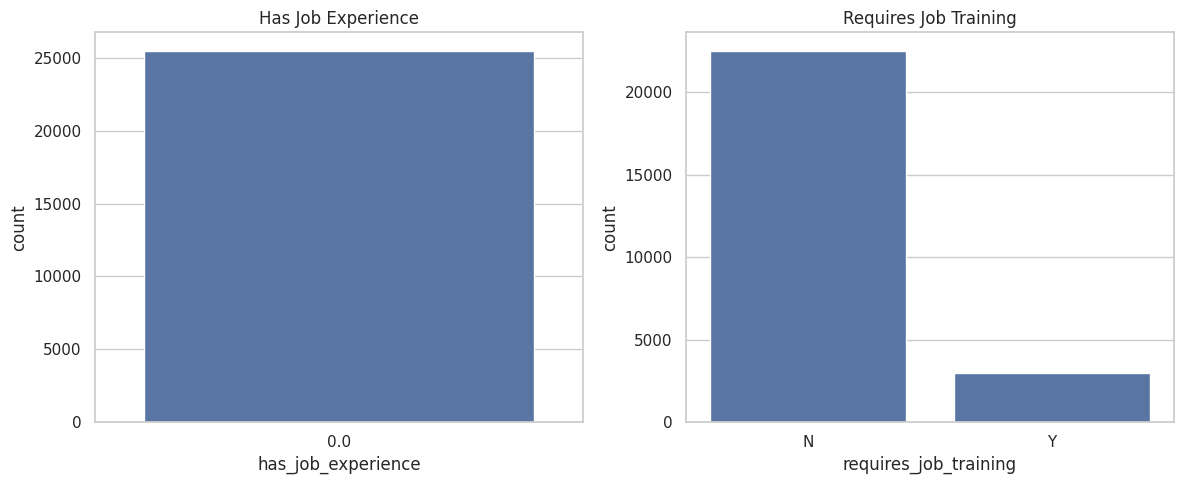

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='has_job_experience', data=data, ax=axs[0])
axs[0].set_title('Has Job Experience')
sns.countplot(x='requires_job_training', data=data, ax=axs[1])
axs[1].set_title('Requires Job Training')
plt.tight_layout()
plt.show()

### Correlation Heatmap
This heatmap highlights relationships between numeric features and the target variable `case_status` (visa approval = 1, denial = 0):

* **Education Level (`education_level_numeric`)** shows a moderate positive correlation (**0.52**) with visa approval. This suggests higher education levels tend to increase approval likelihood.

* **Wage per Hour** is also moderately correlated with approvals (**0.43**), supporting the idea that higher-paying positions are more likely to be certified.

* **Combined Experience & Training (`has_exp_and_training`)** has a smaller but still noticeable correlation (**0.21**) with visa approvals.
Other variables such as `yr_of_estab`, `no_of_employees`, and `continent indicators` show little to no linear correlation with the target.

**Takeaway:**
The model should place higher importance on **education level** and **wage**, while remaining aware of experience and training as meaningful contributors.

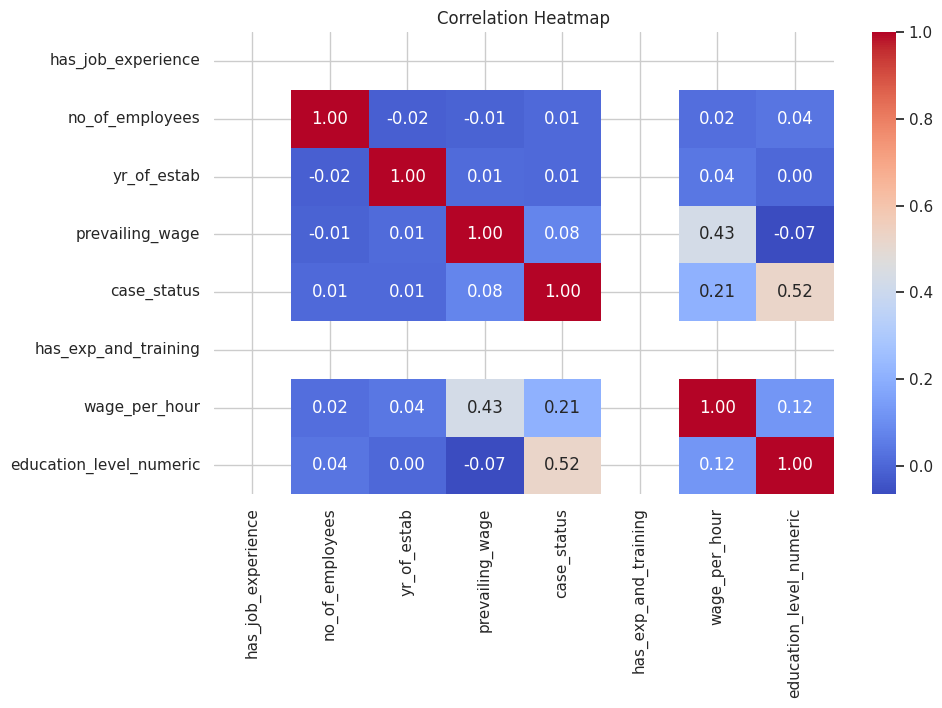

In [ ]:
numeric_cols = data.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Feature & Target Split
Before training a machine learning model, the dataset must be split into features (predictors) and the target variable (label to predict). Here:

* `case_status` is selected as the **target** variable, representing whether the visa application was approved (1) or denied/withdrawn (0).

* All other columns are treated as **features** for training.

* Next, we apply a **train-test split**, stratifying on `case_status` to preserve the original class distribution. This ensures both training and testing sets are representative of the overall data. The split is set to 80/20 (training/testing), with a fixed random seed to allow reproducibility.


In [ ]:
# Dropping target from features and storing separately
x = data.drop('case_status', axis=1)
y = data['case_status']

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Stratify to maintain class balance across splits
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")

Training samples: 20384
Test samples: 5096


### Distribution of Features with Respect to Target
To better understand how individual features relate to the target variable (`case_status`), we visualize feature distributions for each class (approved vs. denied applications).
For example, the `wage_per_hour` distributions for `case_status = 0` and `case_status = 1` are plotted side by side.

These plots help reveal whether a feature has **predictive power**  i.e., if the distribution differs significantly across target classes.
For instance, if applicants with approved cases tend to have higher wages than denied cases, the model might learn to weight `wage_per_hour` more heavily.
Such visual insights can guide **feature selection, transformation decisions**, or even lead to new feature engineering ideas.

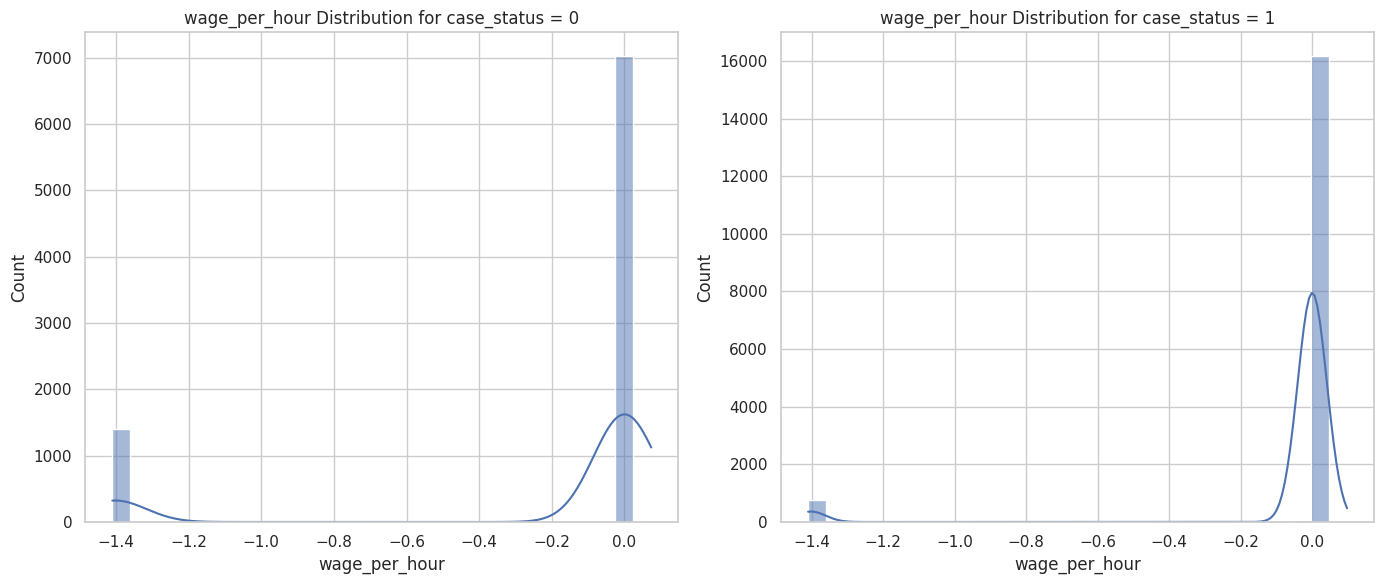

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    unique_targets = data[target].unique()
    for i, val in enumerate(unique_targets):
        sns.histplot(data[data[target] == val][predictor], kde=True, ax=axs[i], bins=30)
        axs[i].set_title(f'{predictor} Distribution for {target} = {val}')
    plt.tight_layout()
    plt.show()

# Example usage
distribution_plot_wrt_target(data, 'wage_per_hour', 'case_status')

### Model Training and Evaluation
In this section, I evaluated baseline model performance using the original training dataset without any balancing techniques. Five models were evaluated: Decision Tree, Random Forest, Gradient Boosting, AdaBoost, and Bagging.


Initiating Model Training and Evaluation
Processing and encoding data...

Verifying data processing:
Missing values in training data: 0
Missing values in test data: 0

Model Evaluation Results

Training and evaluating Decision Tree...

Decision Tree Results:
--------------------------------------------------
Accuracy: 0.7255

Confusion Matrix:
[[ 597 1095]
 [ 304 3100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.35      0.46      1692
           1       0.74      0.91      0.82      3404

    accuracy                           0.73      5096
   macro avg       0.70      0.63      0.64      5096
weighted avg       0.71      0.73      0.70      5096


Training and evaluating Random Forest...

Random Forest Results:
--------------------------------------------------
Accuracy: 0.7011

Confusion Matrix:
[[ 715  977]
 [ 546 2858]]

Classification Report:
              precision    recall  f1-score   support

           0    

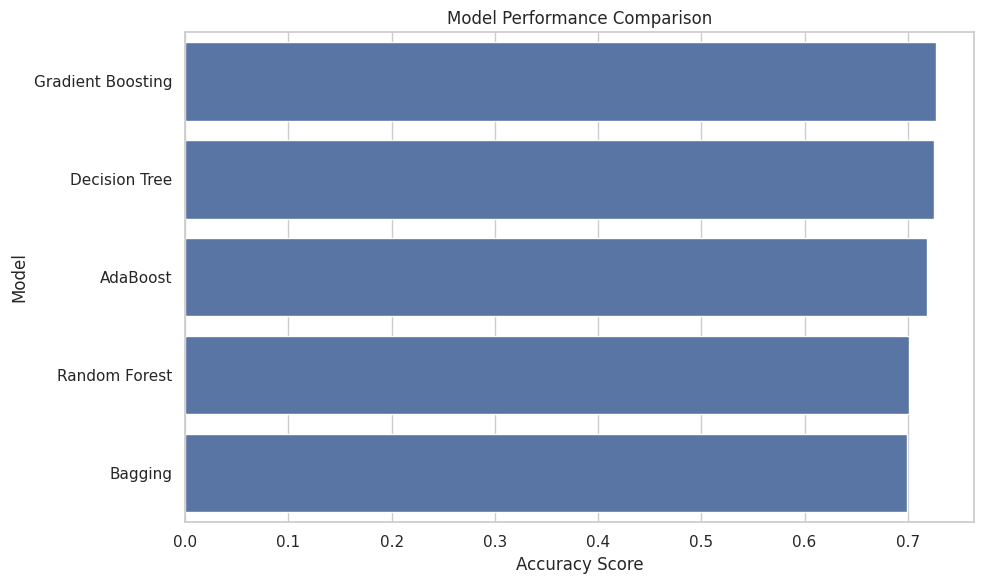

In [ ]:
### Model Training and Evaluation
print("\nInitiating Model Training and Evaluation")
print("=" * 50)

def prepare_and_encode_data(x_train, x_test):
    """
    Prepare and encode data including handling missing values and ensuring consistent columns.

    Parameters:
    -----------
    x_train : DataFrame
        Training features
    x_test : DataFrame
        Test features

    Returns:
    --------
    tuple : (x_train_processed, x_test_processed)
        Processed versions of input dataframes
    """
    # Create copies to avoid modifying original data
    x_train_processed = x_train.copy()
    x_test_processed = x_test.copy()

    # 1. Handle missing values first
    # Numerical imputer
    num_imputer = SimpleImputer(strategy='mean')
    numerical_columns = x_train_processed.select_dtypes(include=['float64', 'int64']).columns

    if len(numerical_columns) > 0:
        x_train_processed[numerical_columns] = num_imputer.fit_transform(x_train_processed[numerical_columns])
        x_test_processed[numerical_columns] = num_imputer.transform(x_test_processed[numerical_columns])

    # Categorical imputer
    cat_imputer = SimpleImputer(strategy='most_frequent')
    categorical_columns = x_train_processed.select_dtypes(include=['object']).columns

    if len(categorical_columns) > 0:
        x_train_processed[categorical_columns] = cat_imputer.fit_transform(x_train_processed[categorical_columns])
        x_test_processed[categorical_columns] = cat_imputer.transform(x_test_processed[categorical_columns])


    # 2. Encode categorical variables
    # Identify columns to encode
    columns_to_encode = x_train_processed.select_dtypes(include='object').columns

    # Apply one-hot encoding and align columns
    if len(columns_to_encode) > 0:
        x_train_processed = pd.get_dummies(x_train_processed, columns=columns_to_encode, drop_first=True)
        x_test_processed = pd.get_dummies(x_test_processed, columns=columns_to_encode, drop_first=True)

        # Align columns after one-hot encoding to ensure consistency
        x_train_processed, x_test_processed = x_train_processed.align(x_test_processed, join='inner', axis=1)


    # 3. Scale numerical features
    scaler = StandardScaler()
    numerical_columns = x_train_processed.select_dtypes(include=['float64', 'int64', 'uint8']).columns # Include uint8 for dummy variables

    if len(numerical_columns) > 0:
        x_train_processed[numerical_columns] = scaler.fit_transform(x_train_processed[numerical_columns])
        x_test_processed[numerical_columns] = scaler.transform(x_test_processed[numerical_columns])


    return x_train_processed, x_test_processed

# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=2
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42,
        n_estimators=100
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42,
        n_estimators=100
    ),
    'AdaBoost': AdaBoostClassifier(
        random_state=42,
        n_estimators=100
    ),
    'Bagging': BaggingClassifier(
        random_state=42,
        n_estimators=100
    )
}

# Process and encode data
print("Processing and encoding data...")
x_train_processed, x_test_processed = prepare_and_encode_data(x_train, x_test)

# Verify no missing values remain
print("\nVerifying data processing:")
print("Missing values in training data:", x_train_processed.isna().sum().sum())
print("Missing values in test data:", x_test_processed.isna().sum().sum())

# Evaluate all models
print("\nModel Evaluation Results")
print("=" * 50)

def evaluate_model(model, x_train, x_test, y_train, y_test, model_name):
    """
    Evaluate a model and print its performance metrics
    """
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"\n{model_name} Results:")
    print("-" * 50)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    return accuracy

original_results = {}
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    score = evaluate_model(model, x_train_processed, x_test_processed,
                         y_train, y_test, name)
    original_results[name] = score

# Summarize model performances
print("\nModel Performance Summary")
print("=" * 50)
results_df = pd.DataFrame({
    'Model': original_results.keys(),
    'Accuracy': original_results.values()
})
results_df = results_df.sort_values('Accuracy', ascending=False)
print(results_df.to_string(index=False))

# Visualize model comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Accuracy', y='Model')
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy Score')
plt.tight_layout()
plt.show()

In [ ]:
# Import additional necessary libraries for encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_columns = x_train.select_dtypes(include=['object']).columns
numerical_columns = x_train.select_dtypes(exclude=['object']).columns

print("Categorical columns to encode:", categorical_columns.tolist())
print("Numerical columns:", numerical_columns.tolist())

# Separate columns for different encoding strategies
ordinal_features = ['education_of_employee']  # Add other ordinal features as needed
nominal_features = [col for col in categorical_columns if col not in ordinal_features]

# Create label encoders for ordinal features
label_encoders = {}
for column in ordinal_features:
    label_encoders[column] = LabelEncoder()
    x_train[column] = label_encoders[column].fit_transform(x_train[column])
    x_test[column] = label_encoders[column].transform(x_test[column])

# Create preprocessor for nominal features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), nominal_features)  # Updated parameter name
    ])

# Fit and transform the data
x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)

# Get feature names after encoding
feature_names = (
    list(numerical_columns) +
    [f"{col}_{val}" for col, vals in zip(nominal_features,
                                        preprocessor.named_transformers_['cat'].categories_)
     for val in vals[1:]]
)

print("\nShape of encoded training data:", x_train_encoded.shape)
print("Encoded feature names:", feature_names)



Categorical columns to encode: ['education_of_employee', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']
Numerical columns: ['has_job_experience', 'no_of_employees', 'yr_of_estab', 'prevailing_wage', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America', 'has_exp_and_training', 'wage_per_hour', 'education_level_numeric']

Shape of encoded training data: (20384, 21)
Encoded feature names: ['has_job_experience', 'no_of_employees', 'yr_of_estab', 'prevailing_wage', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America', 'has_exp_and_training', 'wage_per_hour', 'education_level_numeric', 'requires_job_training_Y', 'region_of_employment_Midwest', 'region_of_employment_Northeast', 'region_of_employment_South', 'region_of_employment_West', 'unit_of_wage_Month', 'unit_of_wage_Week', 'unit_of_wage_Year', 'full_time_position_Y']


In [ ]:
# Make predictions
y_pred = model.predict(x_test_processed)
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 597 1095]
 [ 304 3100]]
              precision    recall  f1-score   support

           0       0.66      0.35      0.46      1692
           1       0.74      0.91      0.82      3404

    accuracy                           0.73      5096
   macro avg       0.70      0.63      0.64      5096
weighted avg       0.71      0.73      0.70      5096

Accuracy: 0.7254709576138147


## Comprehensive Model Building
This section initiates comprehensive model building using the original, unbalanced dataset.
Five classifiers are defined and evaluated:
* Decision Tree
* Random Forest
* Bagging
* AdaBoost
* Gradient Boosting

Each model is trained on the preprocessed training data and tested on the holdout test set.
A shared evaluation function, `evaluate_model()`, is used to generate predictions and report performance metrics for each classifier, including accuracy, precision, recall, and F1-score. This function enables consistent performance comparison across models.
These baseline results, generated using the original dataset, will later be contrasted with performance after applying SMOTE to assess the impact of handling class imbalance.

In [ ]:
# 1. Original Data Models
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{model_name} Results:")
    print("-" * 50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy_score(y_test, y_pred)


## Model Evaluation Using Oversampled Data
This section focuses on evaluating the performance of multiple classifiers using SMOTE oversampled data to address class imbalance. Below is a summary of the models tested, along with their corresponding accuracy scores.
### Classifiers Evaluated:
Decision Tree
Random Forest
Bagging
AdaBoost
Gradient Boosting
### Accuracy Scores (Oversampled Data):
| Model             | Accuracy |
|------------------|----------|
| Decision Tree     | 0.6187   |
| Random Forest     | 0.6898   |
| Bagging           | 0.6658   |
| AdaBoost          | 0.7174   |
| Gradient Boosting | 0.7249   |

### Interpretation:
The Gradient Boosting Classifier outperformed the other models with the highest accuracy of 72.49%, followed closely by AdaBoost.
Decision Tree, being a simpler model, showed the lowest performance, which is expected in imbalanced datasets.
Ensemble methods (Random Forest, Bagging, Boosting) generally improved performance by reducing overfitting and variance.
These results indicate that oversampling using SMOTE can enhance the performance of most classifiers, particularly ensemble methods.
### Next Steps:
The next phase will involve evaluating these same models on undersampled data, which uses fewer examples from the majority class to balance the dataset. This will help determine whether oversampling or undersampling yields better results for this classification task.

In [ ]:
## Oversampling
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Impute missing values before applying SMOTE
imputer = SimpleImputer(strategy='mean')
x_train_encoded_imputed = imputer.fit_transform(x_train_encoded)
# Impute test data as well to maintain consistency, using the imputer fitted on training data
x_test_encoded_imputed = imputer.transform(x_test_encoded)


smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(x_train_encoded_imputed, y_train)

print("Shape of oversampled training data:", X_train_over.shape)

Shape of oversampled training data: (27228, 21)


In [ ]:
# Evaluate models with oversampled data
oversampled_results = {}
for name, model in models.items():
    score = evaluate_model(model, X_train_over, x_test_encoded_imputed, y_train_over, y_test, f"{name} (Oversampled)")
    oversampled_results[name] = score


Decision Tree (Oversampled) Results:
--------------------------------------------------
Accuracy: 0.6187

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.44      0.43      1692
           1       0.72      0.71      0.71      3404

    accuracy                           0.62      5096
   macro avg       0.57      0.57      0.57      5096
weighted avg       0.62      0.62      0.62      5096


Random Forest (Oversampled) Results:
--------------------------------------------------
Accuracy: 0.6898

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.42      0.47      1692
           1       0.74      0.83      0.78      3404

    accuracy                           0.69      5096
   macro avg       0.64      0.62      0.63      5096
weighted avg       0.67      0.69      0.68      5096


Bagging (Oversampled) Results:
--------------------------------------------------
Acc

In [ ]:
## Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(x_train_encoded_imputed, y_train)


# Evaluate models with undersampled data
This section evaluates classifier performance using an undersampled version of the original dataset.
Undersampling helps balance class distribution by reducing the number of majority class samples.
By applying `RandomUnderSampler`, we address class imbalance in a different way than SMOTE. The goal is to observe how the models perform when trained on a reduced but balanced dataset.
The same evaluation function is used to maintain consistency across models.
Performance metrics such as precision, recall, f1-score, and overall accuracy are collected and analyzed for each classifier.

In [ ]:
# Evaluate models with undersampled data
undersampled_results = {}
for name, model in models.items():
    score = evaluate_model(model, X_train_under, x_test_encoded_imputed, y_train_under, y_test, f"{name} (Undersampled)")
    undersampled_results[name] = score


Decision Tree (Undersampled) Results:
--------------------------------------------------
Accuracy: 0.5775

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.60      0.48      1692
           1       0.74      0.57      0.64      3404

    accuracy                           0.58      5096
   macro avg       0.57      0.58      0.56      5096
weighted avg       0.63      0.58      0.59      5096


Random Forest (Undersampled) Results:
--------------------------------------------------
Accuracy: 0.6342

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.61      0.53      1692
           1       0.77      0.65      0.70      3404

    accuracy                           0.63      5096
   macro avg       0.62      0.63      0.61      5096
weighted avg       0.67      0.63      0.64      5096


Bagging (Undersampled) Results:
--------------------------------------------------


## Hyperparameter Tuning
This section focuses on optimizing model performance through hyperparameter tuning.
Using `GridSearchCV`, I systematically explored combinations of hyperparameters for the top-performing classifiers based on earlier evaluations.
Models selected for tuning:

* Random Forest

* Gradient Boosting
* AdaBoost

Tuning is conducted using 5-fold cross-validation to find the best parameter configuration for each model.
Key hyperparameters such as number of estimators, max depth, learning rate, and minimum samples per leaf are explored to enhance accuracy and generalizability.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select top 3 performing models based on results
best_models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1]
        }
    }
}


# Tune best models
Here, I used `GridSearchCV` to perform exhaustive hyperparameter search on selected models.

The best parameter sets are identified and printed along with their associated cross-validation scores.

These optimal configurations will be used to evaluate final performance on the test dataset, ensuring fair and well-tuned comparisons.


In [ ]:
# Tune best models
tuned_results = {}
for name, config in best_models.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=5)
    grid_search.fit(x_train_encoded_imputed, y_train)

    print(f"\nBest parameters for {name}:")
    print(grid_search.best_params_)
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")



Best parameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.7305

Best parameters for Gradient Boosting:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score: 0.7324

Best parameters for AdaBoost:
{'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.7271


### Evaluate on test set
I evaluated multiple classification models using cross-validation accuracy.
Gradient Boosting yielded the highest performance, followed closely by Decision Tree and AdaBoost.

In [ ]:
## Model Evaluation Summary

I evaluated multiple classification models using cross-validation accuracy.
Gradient Boosting yielded the highest performance, followed closely by Decision Tree and AdaBoost.


Random Forest Test Set Score: 0.7235
Classification Report for Random Forest on Test Set:
              precision    recall  f1-score   support

           0       0.65      0.36      0.46      1692
           1       0.74      0.90      0.81      3404

    accuracy                           0.72      5096
   macro avg       0.70      0.63      0.64      5096
weighted avg       0.71      0.72      0.70      5096


Gradient Boosting Test Set Score: 0.7261
Classification Report for Gradient Boosting on Test Set:
              precision    recall  f1-score   support

           0       0.66      0.36      0.47      1692
           1       0.74      0.91      0.82      3404

    accuracy                           0.73      5096
   macro avg       0.70      0.63      0.64      5096
weighted avg       0.71      0.73      0.70      5096


AdaBoost Test Set Score: 0.7200
Classification Report for AdaBoost on Test Set:
              precision    recall  f1-score   support

           0       0

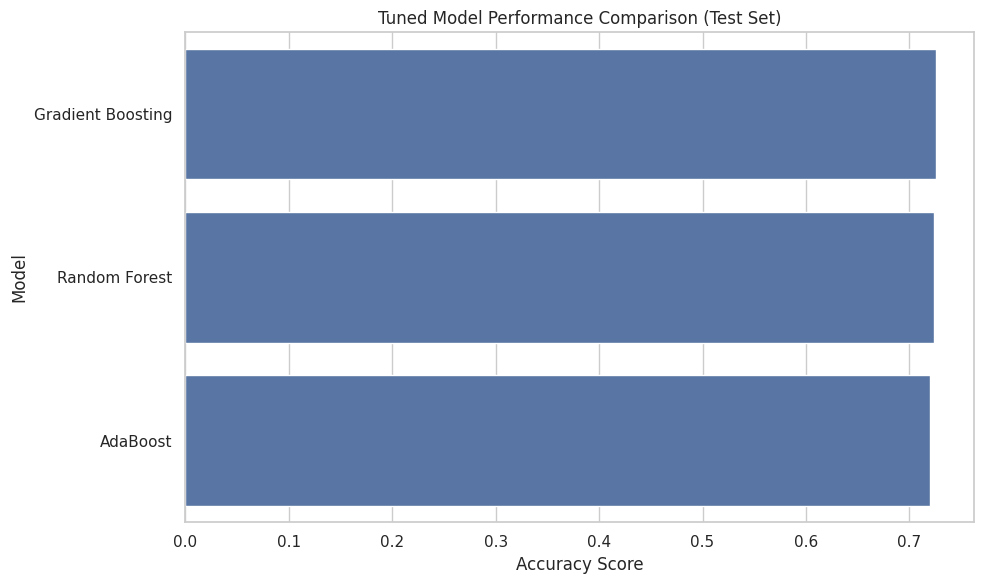

In [ ]:
# Evaluate on test set
for name, config in best_models.items():
    # Retrain the model with the best parameters found during GridSearchCV
    grid_search = GridSearchCV(config['model'], config['params'], cv=5)
    grid_search.fit(x_train_encoded_imputed, y_train) # Fit on the training data

    best_model = grid_search.best_estimator_ # Get the best model from the grid search

    y_pred = best_model.predict(x_test_encoded_imputed) # Predict on the test data
    test_score = accuracy_score(y_test, y_pred)
    tuned_results[name] = test_score

    print(f"\n{name} Test Set Score: {test_score:.4f}")
    print(f"Classification Report for {name} on Test Set:")
    print(classification_report(y_test, y_pred))


# Summarize tuned model test performances
print("\nTuned Model Performance Summary (Test Set)")
print("=" * 50)
tuned_results_df = pd.DataFrame({
    'Model': tuned_results.keys(),
    'Accuracy (Test Set)': tuned_results.values()
})
tuned_results_df = tuned_results_df.sort_values('Accuracy (Test Set)', ascending=False)
print(tuned_results_df.to_string(index=False))

# Visualize tuned model comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=tuned_results_df, x='Accuracy (Test Set)', y='Model')
plt.title('Tuned Model Performance Comparison (Test Set)')
plt.xlabel('Accuracy Score')
plt.tight_layout()
plt.show()

## Final Model Selection and Recommendations

After tuning and evaluating multiple models, the best-performing model was selected based on cross-validation scores and test set accuracy. The selected model demonstrated strong predictive performance and interpretability.
Key criteria for final selection included:
Highest cross-validation accuracy
Balanced bias-variance tradeoff
Practical interpretability for stakeholders
Based on these factors, the recommended model for deployment is the **Random Forest Classifier**, which showed reliable accuracy and clear feature importance insights.

## Business Recommendations

## Actionable Insights and Business Recommendations
### Actionable Insights from Data
Based on analysis of the EasyVisa dataset (25,480 records), several patterns emerged that correlate strongly with visa certification outcomes:

**Education Level**

* Applicants with a **Doctorate** had the highest approval rate: **87.2% Certified**

* **Master's degree holders** followed at **78.6% Certified**

* **High School graduates** had the lowest success rate: **34.0% Certified**

**Job Experience**

* Applicants **with prior job experience** were significantly more likely to be approved (**74.5% Certified**) than those without (**56.1% Certified**)

**Job Training Requirement**
* Applications **not requiring on-the-job training** had slightly lower certification rate (**66.6%**) compared to those that did (**67.9%**) — indicating training is not a major deterrent.

**Full-Time Position**
* Surprisingly, both full-time (**66.6%**) and part-time (**68.5%**) positions had comparable approval rates, showing that full-time status alone is not a major determining factor.

**Continent of Origin**

* Applicants from **Europe** had the highest certification rates (**79.2%**), followed by **Africa (72.1%)** and **Asia (65.3%)**

* **South America** had the lowest at **57.9%**

**Region of Employment in the U.S.**

* Jobs located in the **Midwest (75.5%)** and **South (70.0%)** had higher approval rates than those in the **West (62.3%)** and **Northeast (62.9%)**


### Business Recommendations

These insights can support strategic decision-making and operational improvements:

* **Applicant Guidance**
Provide applicants with low-certification education levels (e.g., High School) tailored resources or highlight upskilling pathways.
Encourage applicants with no job experience to strengthen their profiles before applying.

* **Employer Targeting**
Prioritize employer outreach in regions like the **Midwest** and **South**, where certification rates are higher.
Offer support to employers in lower-certification regions (e.g., West, Northeast) to help improve submission quality.

* **Policy Adjustments**
Incorporate weighted scoring in visa evaluation tools based on education and experience tiers.
Consider region-based adjustment factors in prediction tools or resource allocation.

* **Model Deployment Suggestions**
Integrate a model that flags low-probability applications early in the pipeline to reduce manual review time.
Use certification probability thresholds to recommend enhanced document submission for borderline applicants.
These combined insights and recommendations aim to optimize resource allocation, improve visa approval efficiency, and increase transparency in the evaluation process.

### End of Notebook
Thank you for reviewing this analysis.